# **Project Proposal**

## **Step 1: Preparing Your Proposal**

### *Which client/dataset did you select and why?*

I will work with **StportsStats** dataset, which includes the Olympics data over 120 years.
I think it is possible to find interesting insights about different sports, countries and their medals. In addition, the data is well structured, so it would be easy to work with it.

### *Describe the steps you took to import and clean the data*

Import the libraries

In [1]:
from pandasql import sqldf
import pandas as pd

Load the datasets. Firstly, the *Athlete Events* **(df1)** and then the *NOC regions* **(df2)**

In [2]:
df1 = pd.read_csv("athlete_events_file.csv")
df2 = pd.read_csv("noc_regions.csv")

I set a function `pysqldf` to run SQL commands with Pandas dataframes.

In [3]:
pysqldf = lambda q: sqldf(q, globals())

 This is an example how to use it

 ```python
query = """
        SELECT *
        FROM df1
        LIMIT 10
        """

print(pysqldf(query))

 ```

### *Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at*

I started identifying the name of the columns in each database

In [4]:
print("Columns df1:", pysqldf("""
                              SELECT * 
                              FROM df1
                              LIMIT 0""").columns.to_list())

Columns df1: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [5]:
print("Columns df2:", pysqldf("""
                              SELECT*
                              FROM df2
                              LIMIT 0
                              """).columns.to_list())

Columns df2: ['NOC', 'region', 'notes']


¿How many *distinct* athletes are there?

In [6]:
print(pysqldf("""
              SELECT COUNT(DISTINCT(NAME)) AS Athletes
              FROM df1
              """))

   Athletes
0    134732


¿How many *distinct* athletes are there by **sex**?

In [7]:
print(pysqldf("""
              SELECT SEX, COUNT(SEX) AS count
              FROM (
              SELECT DISTINCT(NAME), SEX
              FROM df1)
              GROUP BY SEX
              """))

  SEX   count
0   F   33808
1   M  100979


**Max**, **Min** and **Average** athletes' age

In [9]:
pysqldf("""
        SELECT Season,     
        MAX(Age) AS Max_Age,
        MIN(Age) AS Min_Age,
        AVG(Age) AS Average_Age
        FROM df1
        GROUP BY Season
        """)

,Season,Max_Age,Min_Age,Average_Age
0,Summer,97.0,10.0,25.674053
1,Winter,58.0,11.0,25.039147


Information about the *oldest* athletes

In [10]:
pysqldf("""
        SELECT *
        FROM df1
        WHERE Age = 97
        """)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,128719,John Quincy Adams Ward,M,97.0,None,None,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",None


In [11]:
pysqldf("""
        SELECT *
        FROM df1
        WHERE Age = 58 AND Season = "Winter"
        """)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,64263,Carl August Verner Kronlund,M,58.0,None,None,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver


Information about the *youngest* athletes

In [12]:
pysqldf("""
        SELECT *
        FROM df1
        WHERE Age = 10
        """)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,71691,Dimitrios Loundras,M,10.0,None,None,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [13]:
pysqldf("""
        SELECT *
        FROM df1
        WHERE Age = 11 AND Season = "Winter"
        """)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,None
1,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,None
2,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,None
3,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,None
4,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,None
5,76675,Marcelle Matthews,F,11.0,NaN,NaN,South Africa,RSA,1960 Winter,1960,Winter,Squaw Valley,Figure Skating,Figure Skating Mixed Pairs,None
6,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,None


Top Countries Based on Medals

In [20]:
pysqldf("""
        SELECT NOC, 
        Medal, 
        COUNT(Medal)
        FROM df1
        GROUP BY NOC, Medal
        HAVING Medal = "Gold"
        ORDER BY COUNT(Medal) DESC
        LIMIT 5
        """)

,NOC,Medal,COUNT(Medal)
0,USA,Gold,2638
1,URS,Gold,1082
2,GER,Gold,745
3,GBR,Gold,678
4,ITA,Gold,575


In [21]:
pysqldf("""
        SELECT NOC, 
        Medal, 
        COUNT(Medal)
        FROM df1
        GROUP BY NOC, Medal
        HAVING Medal = "Silver"
        ORDER BY COUNT(Medal) DESC
        LIMIT 5
        """)

,NOC,Medal,COUNT(Medal)
0,USA,Silver,1641
1,GBR,Silver,739
2,URS,Silver,732
3,GER,Silver,674
4,FRA,Silver,610


In [22]:
pysqldf("""
        SELECT NOC, 
        Medal, 
        COUNT(Medal)
        FROM df1
        GROUP BY NOC, Medal
        HAVING Medal = "Bronze"
        ORDER BY COUNT(Medal) DESC
        LIMIT 5
        """)

,NOC,Medal,COUNT(Medal)
0,USA,Bronze,1358
1,GER,Bronze,746
2,URS,Bronze,689
3,FRA,Bronze,666
4,GBR,Bronze,651


### *Create an ERD or proposed ERD to show the relationships of the data you are exploring*

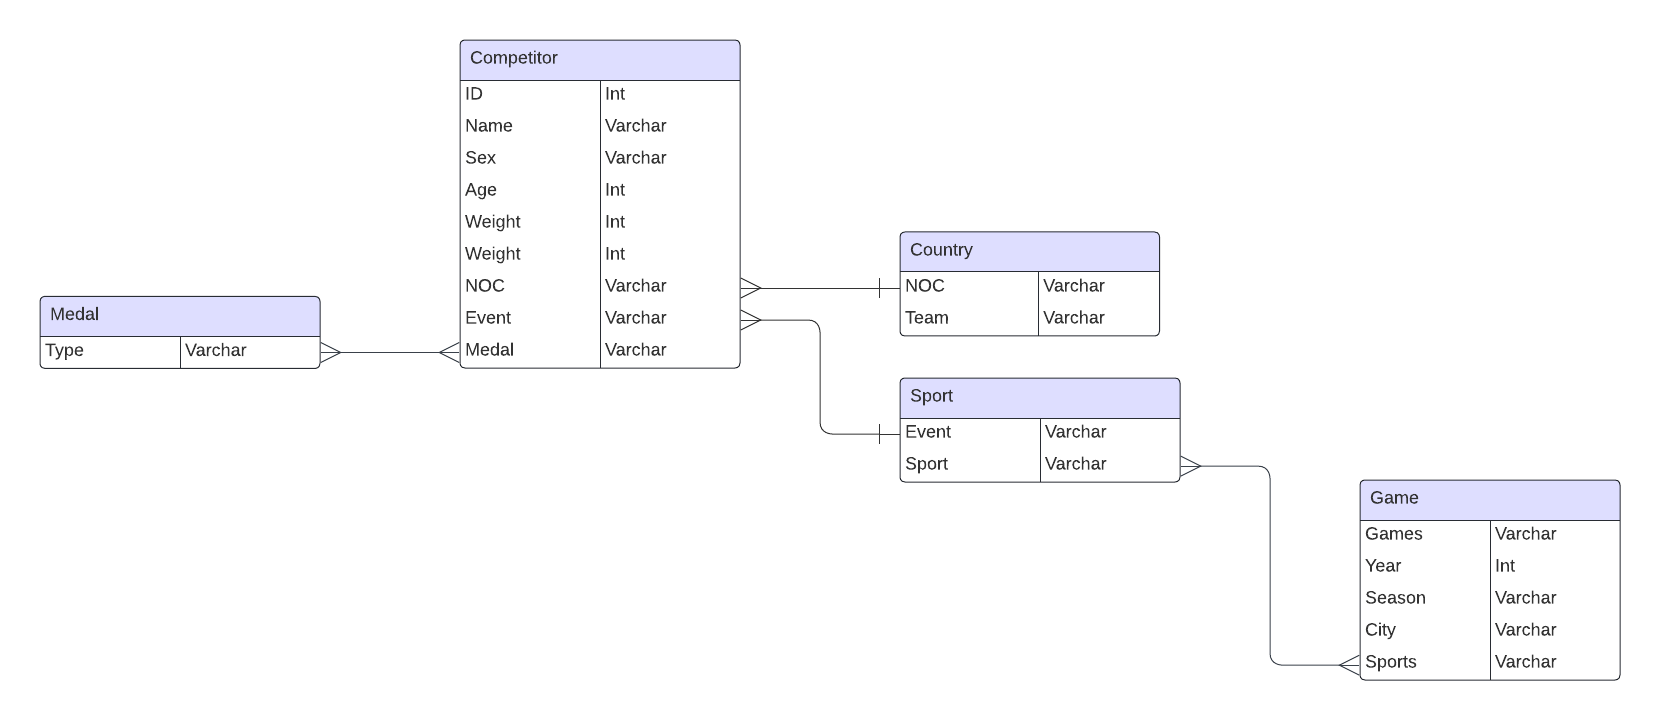

In [24]:
from IPython import display
display.Image("ERD.png")

## **Step 2: Develop Project Proposal**

### *Description*

In this SQL project, we delve into the rich dataset of Olympic sports, examining the correlation between countries and their performance across various sports in both summer and winter games. Additionally, we explore the distribution of medals by gender and age, shedding light on the patterns and trends within these demographics. The findings of this project could be of keen interest to various stakeholders, including sports federations, national Olympic committees, and even potential sponsors. Understanding which sports resonate more strongly with different demographics and regions can inform strategic decisions regarding athlete development, resource allocation, and sponsorship investments. Thus, the audience for this project ranges from sports enthusiasts and analysts to marketing professionals seeking insights into the dynamics of Olympic sports participation and performance.

### *Questions*

1. How does the distribution of medals across different sports vary between summer and winter Olympic games?
2. What are the age and gender demographics of athletes who tend to win the most medals, and does this vary by sport?
3. Are there any notable trends or correlations between a country's overall medal count and its performance in specific sports, both in summer and winter games?

### *Hypotesis*

Certain countries may exhibit a consistent dominance in specific sports across both summer and winter Olympic games. For example, countries with a strong tradition in winter sports may perform exceptionally well in disciplines like skiing or ice hockey during the Winter Olympics.

### *Approach*

To prove or disprove the hypotheses, I will initially focus on several key features from the provided SQL database. Firstly, I will examine the 'Country' or 'NOC' (National Olympic Committee) column to analyze the distribution of medals by country across different sports and Olympic seasons. This will help me identify any patterns of dominance or specialization. Next, I will explore the 'Sport' column to investigate the relationship between specific sports and the countries' performance. This will involve examining which countries excel in which sports and whether these trends differ between summer and winter games. Additionally, I will delve into the 'Age' and 'Sex' columns to assess any correlations between athlete demographics and medal counts, using metrics such as average age of medalists or gender distribution of medals. Lastly, I will employ metrics like correlation coefficients 